In [228]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df.shape

(26620, 53)

In [73]:
r = requests.get('https://www.cambridgema.gov/propertydatabase/18293')
sp = BeautifulSoup(r.text, "lxml")

In [191]:
# scrape Cambridge Assessment Database
# https://www.cambridgema.gov/PropertyDatabase
# through trial and error, the valid range is 3-25000, 185144 - 191500
# output a valid_link dictionary
stub = 'https://www.cambridgema.gov/propertydatabase/'
choose_id = 191890
check_link_list = [stub + str(uid) for uid in range(choose_id,choose_id+5)]
valid_link = {}
for uid, lnk in enumerate(check_link_list):
    r = requests.get(lnk)
    valid_link[uid] = r.status_code


In [192]:
# iteratively scrape pages and place results into o_dict
stub = 'https://www.cambridgema.gov/propertydatabase/'

o_dict = {}
for uid in range(190100, 190200):
    p_dict = {}
        
    r = requests.get(stub + str(uid))
    if r.status_code == 200:
        sp = BeautifulSoup(r.text, "lxml")
        
        # address field
        p_dict['address'] = sp.find_all('h2')[0].get_text()
        
        # other structured fields
        rows = sp.find_all('tr')
        for i in rows:
            try:
                p_dict[i.th.get_text()] = i.td.get_text()
            except:
                continue
        o_dict[r.url.split('/')[-1]] = p_dict

In [161]:
# code to put the raw data frame into a csv
df2 = pd.DataFrame.from_dict(o_dict).T
df2.index = df2.index.astype(int)
df2 = df2.sort_index()
df.to_csv('cambridge3.csv')

In [99]:
def str_to_float(series):
    return series.astype(str).apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [288]:
df = pd.read_csv('cambridge3.csv', parse_dates=['Sale Date'])
df = df.set_index('ID')
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('/','').str.replace('.','')

bookpage_parse = df['bookpage'].str.replace('//','/').str.split('/', expand=True)
df['book'] = bookpage_parse.iloc[:,0]
df['page'] = bookpage_parse.iloc[:,1]
df['sale_year'] = df['sale_date'].dt.year

df = df.drop(['bookpage', 'sale_date'],1)

currency_columns = ['assessed_value', 'building_value', 'land_value', 'previous_assessed_value', 'sale_price',
                   'land_area_(sq_ft)', 'living_area_(sq_ft)']
for col in currency_columns:
    df[col] = str_to_float(df[col])

case_columns = ['exterior_wall_type', 'heat_type']
for col in case_columns:
    df[col] = df[col].str.lower().str.replace('-','_').str.replace(' ','_')
df['heat_type'].str.replace('h.v.a.c.','h.v.a.c').str.replace('hot_watr_rad', 'hw_radiator')

In [290]:
df['heat_type'].value_counts()

hot_water       8223
forced_air      7481
steam           4081
heat_pump        893
other            548
hw_radiator      447
elec_wall        404
space_heat       310
h.v.a.c          128
hot/chld_wtr     113
package_a/c      110
none              46
wrm/cool_air      23
elec_radiant      21
hot_watr_rad       4
combination        2
Name: heat_type, dtype: int64

In [ ]:
# price assessment decisions
# variance of assessment with another data source (zillow)


In [180]:
df.iloc[1000,:].T

assessed_value                                                        804400
bedrooms                                                                   4
bookpage                                                          15616/ 131
building_value                                                        483200
central_ac                                                                No
covered_parking                                                            0
description                                                              NaN
exterior_wall_type                                            Asbstos Shingl
fireplaces                                                                 0
floor_location                                                           NaN
flooring                                                                 NaN
full_baths                                                                 2
garage_parking                                                           NaN

In [214]:
chg = (df['assessed_value'] / df['previous_assessed_value']) - 1
chg[chg > 2] = np.nan
chg[chg <=-1] = np.nan
chg = chg.round(2)

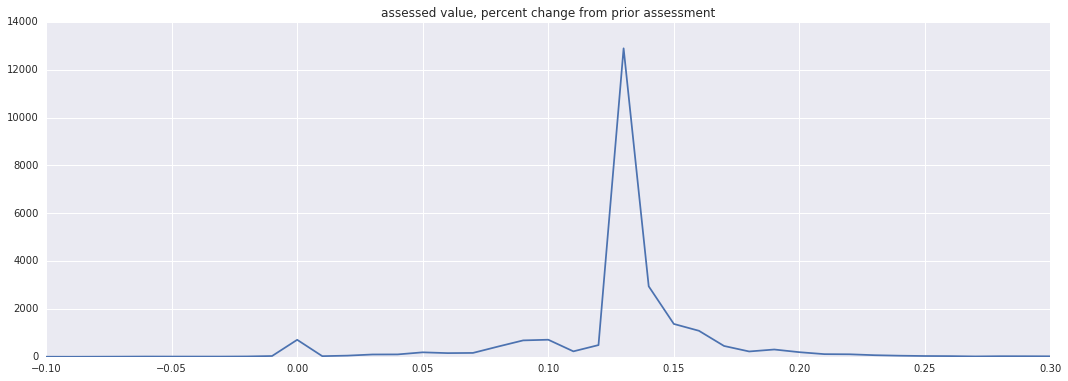

In [231]:
chg.value_counts().sort_index()[-.1:.3].plot(figsize=(18,6))
plt.title('assessed value, percent change from prior assessment')

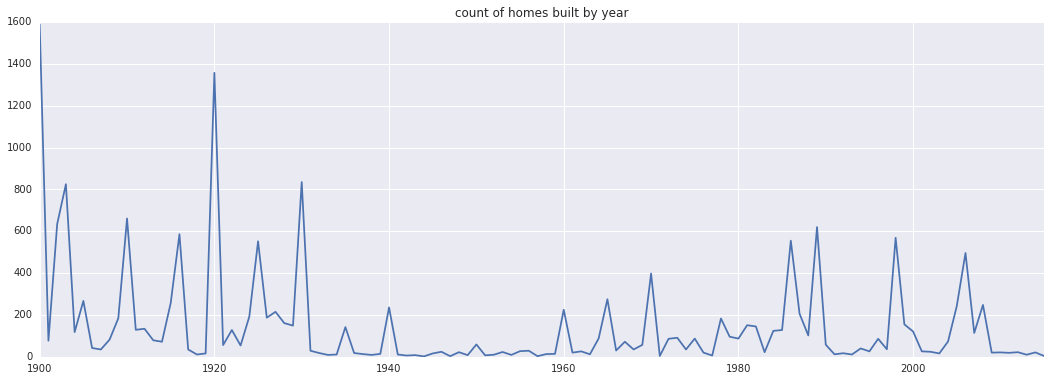

In [230]:
df['year_built'].value_counts().sort_index()[1900:].plot(figsize=(18,6))
plt.title('count of homes built by year')

In [247]:
df.ix[df['living_area_(sq_ft)'] > 100000].sort_values('living_area_(sq_ft)')

,assessed_value,bedrooms,building_value,central_ac,covered_parking,description,exterior_wall_type,fireplaces,floor_location,flooring,...,total_rooms,unit_type,view,wall_height,year_built,year_of_assessment,zoning_(unofficial),address,book,page
ID,,,,,,,,,,,,,,,,,,,,,
194,17186700.0,NaN,9930000.0,NaN,NaN,LOADING DOCK,BRICK-VENEER,NaN,NaN,NaN,...,NaN,C,NaN,10.0,1990.0,2016,PUD-4,60-68 First St,19824,293
2914,39231900.0,NaN,29299200.0,NaN,NaN,ELEV-PSNGR,BRICK,NaN,NaN,NaN,...,NaN,U,NaN,16.0,1950.0,2016,SD-8,130 Waverly St,45356,298
14779,23656000.0,NaN,17427200.0,NaN,NaN,CELL TOWER,BRICK,NaN,NaN,NaN,...,NaN,U,NaN,12.0,1890.0,2016,BA-2,2067 Massachusetts Ave,28494,149
189371,50613500.0,0.0,50613500.0,NaN,0.0,NaN,NaN,0.0,NaN,Carpet,...,1.0,NaN,Average,NaN,2008.0,2016,NaN,"1 Hampshire St, Unit B1/2/3N",52027,80
628,55969500.0,NaN,41663700.0,NaN,NaN,NaN,BRICK,NaN,NaN,NaN,...,NaN,NaN,NaN,12.0,1985.0,2016,PUD-2,87-97 Cambridge Pkwy,1254,129
18468,23931300.0,NaN,15531300.0,NaN,NaN,ELEV-PSNGR,BRICK,NaN,NaN,NaN,...,NaN,U,NaN,10.0,1890.0,2016,C-2,24-26 Concord Ave,19702,321
2523,77938100.0,NaN,63200700.0,NaN,NaN,ELEV-PSNGR,CONCR PANEL,NaN,NaN,NaN,...,NaN,U,NaN,14.0,1935.0,2016,IB,1 Kendall Sq-2,1448,19
21900,28473900.0,NaN,20842800.0,NaN,NaN,NaN,OTHER,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,1973.0,2016,C-3B,27 Ames St,,
193,30974600.0,NaN,23316800.0,NaN,NaN,ELEV-PSNGR,BRICK-VENEER,NaN,NaN,NaN,...,NaN,U,NaN,12.0,1992.0,2016,PUD-4,1 Canal Pk,63406,330


In [277]:
df['view'].value_counts().sort_values(ascending=False)

Average       12195
Good            704
Very Good       409
Excellent       403
Fair             47
Poor             10
River View        3
Name: view, dtype: int64

In [285]:
y = df['assessed_value']
X = df[['bedrooms', 'total_rooms','full_baths', 'central_ac', 'covered_parking', 'fireplaces',  'heat_fuel', 
        'heat_type', 'land_area_(sq_ft)', 'laundry_in_unit', 'living_area_(sq_ft)',
       'number_of_stories', 'number_of_units','occupancy', 'open_parking', 'previous_assessed_value', 
        'sale_year', 'sale_price', 'state_class_code', 'tax_district',  'year_built']]
X = pd.get_dummies(X)

In [289]:
df['heat_type'].value_counts()

hot_water       8223
forced_air      7481
steam           4081
heat_pump        893
other            548
hw_radiator      447
elec_wall        404
space_heat       310
h.v.a.c          128
hot/chld_wtr     113
package_a/c      110
none              46
wrm/cool_air      23
elec_radiant      21
hot_watr_rad       4
combination        2
Name: heat_type, dtype: int64

In [286]:
for i in X.columns:
    print i

bedrooms
total_rooms
full_baths
covered_parking
fireplaces
land_area_(sq_ft)
living_area_(sq_ft)
number_of_stories
number_of_units
open_parking
previous_assessed_value
sale_year
sale_price
state_class_code
year_built
central_ac_No
central_ac_Yes
heat_fuel_Combination
heat_fuel_Electric
heat_fuel_Gas
heat_fuel_None
heat_fuel_Oil
heat_fuel_Other
heat_fuel_Wood
heat_type_combination
heat_type_elec_radiant
heat_type_elec_wall
heat_type_forced_air
heat_type_h.v.a.c
heat_type_h.v.a.c.
heat_type_heat_pump
heat_type_hot/chld_wtr
heat_type_hot_water
heat_type_hot_watr_rad
heat_type_hw_radiator
heat_type_none
heat_type_other
heat_type_package_a/c
heat_type_space_heat
heat_type_steam
heat_type_wrm/cool_air
laundry_in_unit_No
laundry_in_unit_Yes
occupancy_121 Corporation
occupancy_4-8-UNIT-APT
occupancy_>8-UNIT-APT
occupancy_ASSISTED-LIV
occupancy_AUTO-REPAIR
occupancy_AUTO-SALES
occupancy_AUTO-SUPPLY
occupancy_BANK
occupancy_BOARDING-HSE
occupancy_CAR-WASH
occupancy_CHILD-CARE
occupancy_CLEAN-MAN

In [267]:
from sklearn.ensemble import RandomForestRegressor

In [269]:
from sklearn.model_selection import train_test_split

ImportError: No module named model_selection

In [ ]:
sklearn.feature_selection.